2x2 square lattice with 9 sites and 10 nm bond length


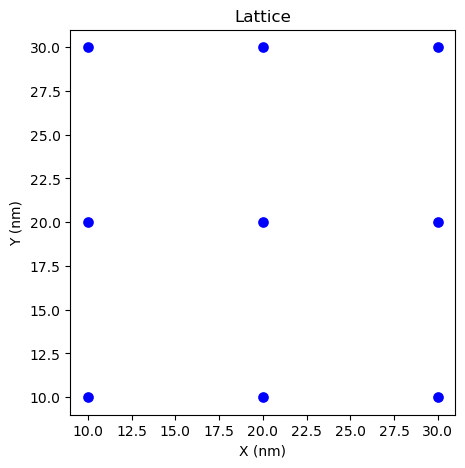

In [1]:
from HB_lattice import *

latt = HB_lattice(parallel=False)
latt.create_lattice('square', 2, 10)
# latt.create_custom_lattice("coords.csv") 

Hofstadter plot: using Hamiltonian method: hopping
Loaded parameters:


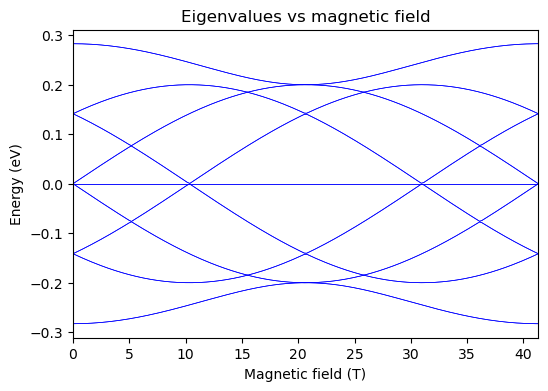

In [6]:
#ham_type = "hopping":
#t = [0.1, 0.01, ...]
#t_so = [0.01, ...]

#ham_type = "interpolation":
# a_param = 1
# b_param = 10

latt.plot_hofstadter(41.3, 200, g_factor=0, ham_type='hopping')

DOS for eigenvalue sets of magnetic field : [0, 100]
energy range from -0.3 to 0.3
numerical smearing is 0.001


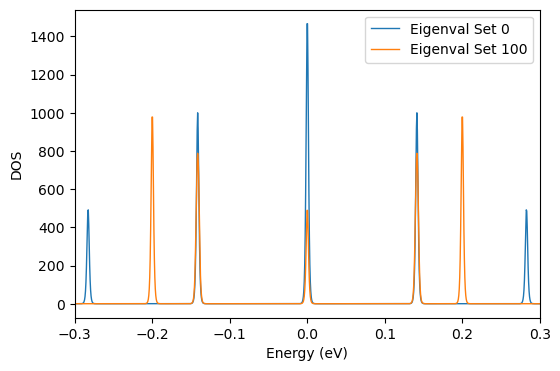

In [7]:
latt.plot_dos([0, 100], e_min=-0.3, e_max=0.3, smear=0.001)

Map plotting settings:
  Eigenstates included: [0, 1]
  Map resolution = 100
  Gaussian smearing = 40
  Using eigenvector set from magnetic field index: 100
  State 0: Eigenvalue = -0.2000049573633411
  State 1: Eigenvalue = -0.20000495736334098


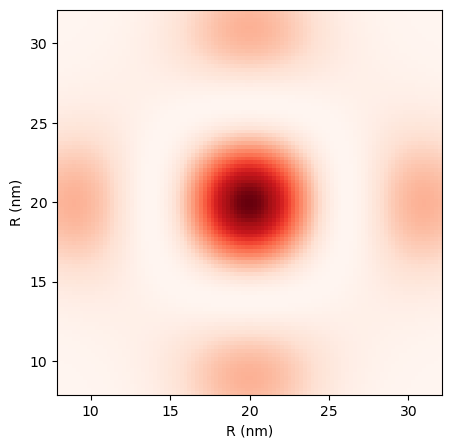

In [12]:
latt.plot_map([0, 1], smear=40, b_index=100)